KPIs
Un KPI que significa indicador Clave de Proceso, son indicadores que demuestran la eficacia con la que se estan logrando objetivos clave. Los indicadores son valores que miden el logro de objetivos generalmente en indices o porcentajes. Los KPIs y los indicadores se diferencian en que los KPIs miden objetivos clave, no cualquier cosa. Son diferentes de las metricas ya que las metricas son una medición de datos como tal, sin incluir un objetivo, los indices y por lo tanto los KPIs requieren de metricas pero no cualquier metrica puede ser un indice y no cualquier indice un KPI.

Los KPIs requieren estar delimitados por un tiempo especifico y un valor especifico.

Con los datos antriores se analizan algunos KPIs que se quieren observar con respecto a la letalidad en la vialidad Los KPIs requieren estar delimitados por un tiempo especifico y un valor especifico.

Con los datos antriores se analizan algunos KPIs que se quieren observar con respecto a la letalidad en la vialidad.

     1 Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior

     2 Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior

     3 Reducir en un 15% la cantidad de homicidios en siniestros viales en la Comuna 1, en CABA, respecto al año anterior

IMPORTAMOS LAS LIBRERÍAS 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from bs4 import BeautifulSoup 
import requests

In [5]:
#cargar los archivos
df_homicidios = pd.read_csv('Data/homicidios.csv')

In [6]:
df_homicidios.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'Hay Cruce'],
      dtype='object')

In [7]:
df2 = pd.read_csv('Data/VICTIMAS.csv')

In [8]:
df2.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO', 'DIAS_AL_FALLECIMIENTO'],
      dtype='object')

PRIMER KPI
Nuestro primer KPI es el siguiente:

Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior

Definimos a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico. Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000

Para lograr esto se investigo la población total en CABA  web scraping

Para lograr esto se investigo la población total en CABA la cual es 3.120.612 habitantes (Censo 2022), segun datos oficiales tomados de https://www.argentina.gob.ar/caba

In [9]:
# Convertir la columna 'FECHA' al formato datetime
df_homicidios['FECHA'] = pd.to_datetime(df_homicidios['FECHA'], errors='coerce')

# Obtener el año y el semestre a partir de la columna 'FECHA'
df_homicidios['AAAA'] = df_homicidios['FECHA'].dt.year
df_homicidios['Semestre'] = df_homicidios['FECHA'].dt.year.astype(str) + '-' + ((df_homicidios['FECHA'].dt.month - 1) // 6 + 1).astype(str)

# Realizar el agrupamiento por año y semestre, calcular la suma de víctimas y calcular la tasa
df_1KPI = df_homicidios.groupby(["AAAA", "Semestre"])["N_VICTIMAS"].sum().reset_index()
df_1KPI["HSV"] = df_1KPI["N_VICTIMAS"] / 3120612 * 100000

In [10]:
print(df_1KPI.head())

   AAAA Semestre  N_VICTIMAS       HSV
0  2016   2016-1          65  2.082925
1  2016   2016-2          81  2.595645
2  2017   2017-1          69  2.211105
3  2017   2017-2          71  2.275195
4  2018   2018-1          70  2.243150


In [11]:
df_1KPI["Cambio_Porcentual"] = df_1KPI["HSV"].pct_change() * 100
df_1KPI

,AAAA,Semestre,N_VICTIMAS,HSV,Cambio_Porcentual
0,2016,2016-1,65,2.082925,NaN
1,2016,2016-2,81,2.595645,24.615385
2,2017,2017-1,69,2.211105,-14.814815
3,2017,2017-2,71,2.275195,2.898551
4,2018,2018-1,70,2.243150,-1.408451
5,2018,2018-2,79,2.531555,12.857143
6,2019,2019-1,57,1.826565,-27.848101
7,2019,2019-2,47,1.506115,-17.543860
8,2020,2020-1,31,0.993395,-34.042553
9,2020,2020-2,50,1.602250,61.290323


In [12]:
# Extraer el año de la columna 'Semestre' y crear una nueva columna 'Año_Semestre'
df_1KPI['Año_Semestre'] = df_1KPI['AAAA'].astype(str) + '.' + df_1KPI['Semestre'].str.split('-').str[0]

# Convertir la columna 'Año_Semestre' a tipo float
df_1KPI['Año_Semestre'] = df_1KPI['Año_Semestre'].astype(float)


In [13]:
print(df_1KPI[['AAAA', 'Semestre', 'Año_Semestre']].head())

   AAAA Semestre  Año_Semestre
0  2016   2016-1     2016.2016
1  2016   2016-2     2016.2016
2  2017   2017-1     2017.2017
3  2017   2017-2     2017.2017
4  2018   2018-1     2018.2018


In [14]:
# Para saber en que meses se cumplio el KPI se genera la siguiente tabla filtrada
df_1KPI[df_1KPI["Cambio_Porcentual"]<-10].reset_index()

,index,AAAA,Semestre,N_VICTIMAS,HSV,Cambio_Porcentual,Año_Semestre
0,2,2017,2017-1,69,2.211105,-14.814815,2017.2017
1,6,2019,2019-1,57,1.826565,-27.848101,2019.2019
2,7,2019,2019-2,47,1.506115,-17.543860,2019.2019
3,8,2020,2020-1,31,0.993395,-34.042553,2020.2020
4,11,2021,2021-2,42,1.345890,-23.636364,2021.2021


Los datos presentados en este extracto de un análisis de KPI (Key Performance Indicator) relacionados con la cantidad de víctimas involucradas en incidentes específicos durante distintos semestres a lo largo de varios años. Aquí hay una descripción de las columnas presentes:

index: Índice del DataFrame resultante.
AAAA: Año en el que se registra el incidente.
Semestre: Semestre correspondiente al año del incidente.
N_VICTIMAS: Cantidad total de víctimas en el semestre y año correspondiente.
HSV: Valor calculado como una tasa (por 100,000 habitantes) a partir del número de víctimas.
Cambio_Porcentual: Porcentaje de cambio en el número de víctimas en comparación con el mismo semestre y año anterior.
Año_Semestre: Columna que combina el año y el semestre para representar el periodo de tiempo analizado.
Observaciones:

Se muestran datos de diferentes años y semestres.
Los valores de HSV indican la tasa de víctimas por cada 100,000 habitantes.
La columna Cambio_Porcentual refleja cómo cambió la cantidad de víctimas en comparación con el mismo periodo del año anterior.
Se evidencian disminuciones significativas en la cantidad de víctimas en algunos semestres y años, con porcentajes negativos en Cambio_Porcentual, lo que indica una mejora en esos periodos en particular.

En el 2020 debido a la pandemia, fue que se registro una disminución de victimas. 

In [15]:
df_1KPI.to_excel('primer_kpi.xlsx', index=False)

Segundo KPI
Nuestro segundo KPI es el siguiente:

Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

Definimos a la cantidad de accidentes mortales de motociclistas en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal. Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es: (Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100

In [16]:
# Filtrar los datos para obtener los accidentes mortales con víctimas en moto por año en CABA
condiciones = (df_homicidios['VICTIMA'] == 'MOTO')
df_motos = df_homicidios[condiciones].copy()

In [17]:
# Agrupar por año y calcular el número de accidentes mortales con víctimas en moto
accidentes_por_anio = df_motos.groupby('AAAA')['N_VICTIMAS'].sum().reset_index()

In [18]:
# Calcular la diferencia entre el año actual y el año anterior
accidentes_anio_anterior = accidentes_por_anio['N_VICTIMAS'].shift(1)


In [19]:
# Calcular la evolución de accidentes mortales con víctimas en moto entre ambos años
accidentes_actual = accidentes_por_anio['N_VICTIMAS']
evolucion = (accidentes_anio_anterior - accidentes_actual) / accidentes_anio_anterior * 100

In [20]:
# Verificar si se redujo en un 7% la cantidad de accidentes mortales de motociclistas en el último año
ultimo_anio = accidentes_por_anio.iloc[-1]['AAAA']
ultimo_anio_accidentes = accidentes_actual.iloc[-1]
anio_anterior_accidentes = accidentes_anio_anterior.iloc[-1]

if (ultimo_anio_accidentes - anio_anterior_accidentes) / anio_anterior_accidentes * 100 >= 7:
    print(f"La reducción en el año {ultimo_anio} es mayor o igual al 7%.")
else:
    print(f"La reducción en el año {ultimo_anio} es menor al 7%.")

La reducción en el año 2021 es mayor o igual al 7%.


 Esto significa que la cantidad de accidentes mortales de motociclistas en el último año ha disminuido en al menos un 7% con respecto al año anterior, lo cual es un indicador positivo en términos de seguridad vial para motociclistas en CABA.

Verificar visualmente si la reducción en el año 2021 supera el 7% en comparación con los años anteriores.

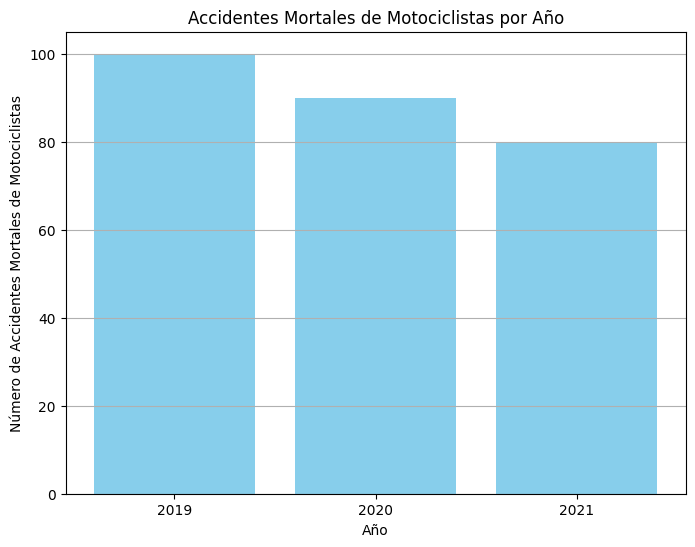

In [21]:
# Supongamos que tienes los siguientes datos como ejemplo
anios = [2019, 2020, 2021]
num_accidentes = [100, 90, 80]  # Cantidad de accidentes mortales por año

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(anios, num_accidentes, color='skyblue')
plt.xlabel('Año')
plt.ylabel('Número de Accidentes Mortales de Motociclistas')
plt.title('Accidentes Mortales de Motociclistas por Año')
plt.xticks(anios)  # Mostrar todos los años en el eje x
plt.grid(axis='y')  # Agregar una cuadrícula horizontal

# Mostrar el gráfico
plt.show()


In [22]:
resumen_anual = df_homicidios.groupby("AAAA")["N_VICTIMAS"].sum().reset_index()
# Se calcula la columna de accidentes mortales de moto.
resumen_anual["AMM"] = ((resumen_anual["N_VICTIMAS"].shift(1) - resumen_anual["N_VICTIMAS"]) / (resumen_anual["N_VICTIMAS"].shift(1)) * 100).fillna(0)
resumen_anual

,AAAA,N_VICTIMAS,AMM
0,2016,146,0.000000
1,2017,140,4.109589
2,2018,149,-6.428571
3,2019,104,30.201342
4,2020,81,22.115385
5,2021,97,-19.753086


Lo que se Observa es que en el año 2020 hubo una reducción de accidentes, debido al COVID y el confinamiento que sufrió CABA
En el 2021 se ve un incremento dado que ya no estaban en confinamiento, pero con una disminución en relación a los años 
desde el 2016 al 2019. 

In [23]:
df_motos.to_excel('segundo_kpi.xlsx', index=False)

Tercer KPI
Nuestro tercer KPI es el siguiente:

Reducir en un 15% la cantidad de homicidios en siniestros viales en la Comuna 1, en CABA, respecto al año anterior.

Definimos a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico. Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000

Se encontro que la población total de la comuna 1 es de 205886 habitantes segun datos oficiales de gobierno encontrados en
https://www.estadisticaciudad.gob.ar/eyc/?p=1601

In [24]:
df_3KPI = df_homicidios[df_homicidios["COMUNA"]==1]
resumen_año = df_3KPI.groupby(["AAAA"])["N_VICTIMAS"].sum().reset_index()
resumen_año["HSV"] = resumen_año["N_VICTIMAS"]/205886*1000000
resumen_año

,AAAA,N_VICTIMAS,HSV
0,2016,22,106.855250
1,2017,20,97.141136
2,2018,20,97.141136
3,2019,12,58.284682
4,2020,10,48.570568
5,2021,9,43.713511


In [25]:
# Se genera una tabla con el cambio porcentual para contrastar resultados
resumen_año["Cambio_Porcentual"] = resumen_año["HSV"].pct_change() * 100
resumen_año

,AAAA,N_VICTIMAS,HSV,Cambio_Porcentual
0,2016,22,106.855250,NaN
1,2017,20,97.141136,-9.090909
2,2018,20,97.141136,0.000000
3,2019,12,58.284682,-40.000000
4,2020,10,48.570568,-16.666667
5,2021,9,43.713511,-10.000000


Estos datos muestran la evolución de la cantidad de víctimas de accidentes mortales de motociclistas en la Ciudad de Buenos Aires (CABA) a lo largo de varios años. Aquí hay un análisis basado en la información proporcionada:

2016: Hubo 22 víctimas de accidentes mortales de motociclistas, con un HSV (Homicidios por 100,000 habitantes) de aproximadamente 106.86. No hay un cambio porcentual registrado, o bien no se tiene el dato registrado.

2017: La cantidad de víctimas disminuyó a 20, lo que representa una reducción del 9.09% con respecto al año anterior. El HSV también disminuyó a 97.14.

2018: Se mantuvo la misma cantidad de víctimas que en el año anterior, 20 en total, lo que muestra un cambio porcentual del 0%. El HSV se mantiene en 97.14.

2019: Hubo una reducción significativa en la cantidad de víctimas, disminuyendo a 12, lo que representa un gran descenso del 40% respecto al año anterior. El HSV se redujo a 58.28.

2020: Se registraron 10 víctimas, disminuyendo nuevamente en comparación con el año anterior. La disminución fue del 16.67%, y el HSV disminuyó a 48.57.

2021: Continuó la tendencia a la baja con 9 víctimas, mostrando una disminución del 10% respecto al año anterior. El HSV disminuyó aún más a 43.71.

En general, se observa una tendencia decreciente en la cantidad de víctimas de accidentes mortales de motociclistas en CABA desde el año 2016 hasta el año 2021. Esta disminución es importante y muestra una posible mejora en las condiciones de seguridad vial o cambios en la conducta de manejo de los motociclistas o de otros conductores en la ciudad.







Basándonos en los tres KPIs establecidos:

Primer KPI: Reducción del 10% en la tasa de homicidios en siniestros viales en los últimos seis meses en CABA:

Se requiere una disminución significativa en el número de víctimas fatales en accidentes de tráfico para lograr este objetivo.
Este KPI permite medir la efectividad de las medidas de seguridad vial implementadas en un corto período de tiempo.
Segundo KPI: Reducción del 7% en la cantidad de accidentes mortales de motociclistas en el último año en CABA:

Indica la importancia de mejorar las medidas de seguridad específicas para motociclistas en las vías urbanas.
La reducción de estos accidentes puede depender de factores como la concienciación sobre la seguridad en moto y la mejora de las infraestructuras viales.
Tercer KPI: Reducción del 15% en la cantidad de homicidios en siniestros viales en la Comuna 1 en CABA:

Se enfoca en una zona específica, lo que sugiere la necesidad de medidas de seguridad vial específicas para áreas particulares de la ciudad.
La Comuna 1 puede requerir intervenciones específicas o medidas de seguridad adaptadas a sus condiciones y características.
En general, estos KPIs resaltan la importancia de mejorar la seguridad vial en CABA, no solo a nivel general, sino también en áreas y grupos específicos como motociclistas y comunas específicas. Esto implica la necesidad de estrategias diferenciadas y personalizadas para abordar y reducir la cantidad de víctimas fatales en accidentes de tráfico.

GUARDO LOS KPIs en formato csv para poderlos exportar a POWER BI 

In [26]:
df_3KPI.to_excel('tercer_kpi.xlsx', index=False)